In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


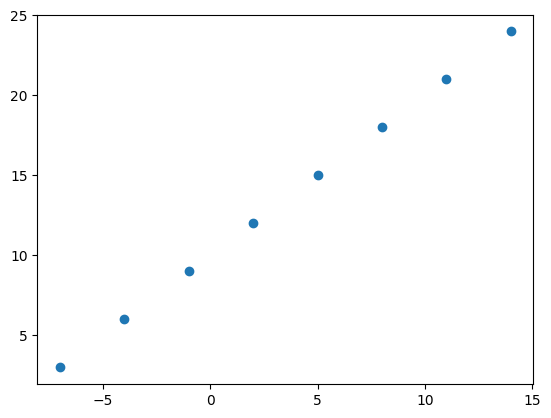

In [ ]:
# creating data for view and fit

import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
x = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y);


In [ ]:

y ==x+10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

input and output shapes

In [ ]:


house_info =tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)

In [ ]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape =x[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

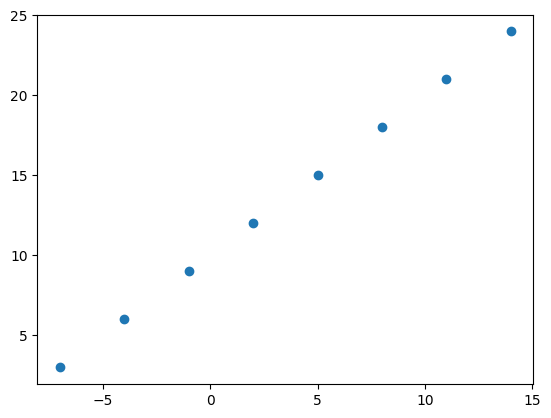

In [ ]:
plt.scatter(x,y)

In [ ]:
# how might we a build a model
# steps with modeling with tensorflow
x.shape,y.shape




(TensorShape([8]), TensorShape([8]))

1. Creating  a model - define the input and output layers , as well as the hiddden layers of  adeep learning models.
2. Compiling a model - define the loss fun (in other  words,the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics ( what we can use to interpret the performance of a model)
3.fitting a model -letting a model try  to find patterns between x and y  

In [ ]:

tf.random.set_seed(42)

# 1. Creating a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
# loss = mean(abs(y_true - y_pred), axis=-1)
model.compile(loss=tf.keras.losses.mae,  # mean absolute error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Assuming you have your input data 'x' and target 'y'
# 3. Fit the model, assuming x and y are your training data
# model.fit(x, y, epochs=5)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 400ms/step - loss: 16.1063 - mae: 16.1063
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 15.8250 - mae: 15.8250
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 15.5438 - mae: 15.5438
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 15.2625 - mae: 15.2625
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 14.9813 - mae: 14.9813


In [ ]:
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 442ms/step - loss: 14.6402 - mae: 14.6402
Epoch 2/5
1/1 [==============================] - 0s 28ms/step - loss: 14.5077 - mae: 14.5077
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 14.3752 - mae: 14.3752
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 14.2427 - mae: 14.2427
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 14.1102 - mae: 14.1102


diff

In [ ]:
model.predict([17.0])


1/1 [==============================] - 0s 87ms/step


array([[-2.513188]], dtype=float32)

improving our model
 by altering the steps we took to create a model.
1. **Creating  a model** - here we migth add more layers increase the numbers of hideen units ( all called neurans)within each of the hidden layers,chnage the activation functions of each layers.
2. **compiling a model** -here we might change the optimization function or perhaps the  **learning rate ** of the optimization function
3. **Fitting a  model** - here we might

In [ ]:
import keras
from keras import layers

# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)

In [ ]:
x

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>

In [ ]:
y

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>

In [ ]:
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
#model.fit(x, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 974ms/step - loss: 11.2837 - mae: 11.2837
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 11.1512 - mae: 11.1512
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 11.0187 - mae: 11.0187
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 10.8862 - mae: 10.8862
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7537 - mae: 10.7537
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 10.6212 - mae: 10.6212
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.4887 - mae: 10.4887
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 10.3562 - mae: 10.3562
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 10.2237 - mae: 10.2237
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0912 - mae: 10.0912
Epoch 11/100
1/1 [==============================] 

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
#model.fit(x, y, epochs=100)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100) # tra

Epoch 1/100
1/1 [==============================] - 0s 364ms/step - loss: 8.2016 - mae: 8.2016
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 8.0691 - mae: 8.0691
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 7.9366 - mae: 7.9366
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 7.8041 - mae: 7.8041
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 7.6716 - mae: 7.6716
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 7.5391 - mae: 7.5391
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4550 - mae: 7.4550
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4494 - mae: 7.4494
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4438 - mae: 7.4438
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4381 - mae: 7.4381
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - lo

In [ ]:
# let rebuild our model
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#model.fit(x, y, epochs=100)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 218ms/step - loss: 13.8887 - mae: 13.8887
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 13.7562 - mae: 13.7562
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 13.6237 - mae: 13.6237
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 13.4912 - mae: 13.4912
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 13.3587 - mae: 13.3587
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 13.2262 - mae: 13.2262
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 13.0937 - mae: 13.0937
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9612 - mae: 12.9612
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 12.8287 - mae: 12.8287
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6962 - mae: 12.6962
Epoch 11/100
1/1 [==============================] - 0s 7m

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 47ms/step


array([[29.931839]], dtype=float32)

In [ ]:
# lets see if we can make another layer
#1. create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])
#2.
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=["mae"])
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 392ms/step - loss: 13.6367 - mae: 13.6367
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.5608 - mae: 13.5608
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 13.4848 - mae: 13.4848
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 13.4090 - mae: 13.4090
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 13.3332 - mae: 13.3332
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 13.2574 - mae: 13.2574
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 13.1816 - mae: 13.1816
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 13.1058 - mae: 13.1058
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0301 - mae: 13.0301
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 12.9545 - mae: 12.9545
Epoch 11/100
1/1 [==============================] - 0s 9

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 49ms/step


array([[19.258165]], dtype=float32)

In [ ]:
#1. create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])
#2.
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.1),
              metrics=["mae"])
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 585ms/step - loss: 13.4950 - mae: 13.4950
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.1374 - mae: 13.1374
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.7960 - mae: 12.7960
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.4694 - mae: 12.4694
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 12.1499 - mae: 12.1499
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 11.8353 - mae: 11.8353
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5286 - mae: 11.5286
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2234 - mae: 11.2234
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9056 - mae: 10.9056
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5691 - mae: 10.5691
Epoch 11/100
1/1 [==============================] - 0s 9

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 56ms/step


array([[30.810387]], dtype=float32)

## Evaluating a model
in practice,a typical workflow yu go through
Evaluating a model
A typical workflow you'll go through when building neural networks is:

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

Visualize, visualize, visualize
When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

The data - what data are you working with? What does it look like?
The model itself - what does the architecture look like? What are the different shapes?
The training of a model - how does a model perform while it learns?
The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
Y=X+10

In [ ]:
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

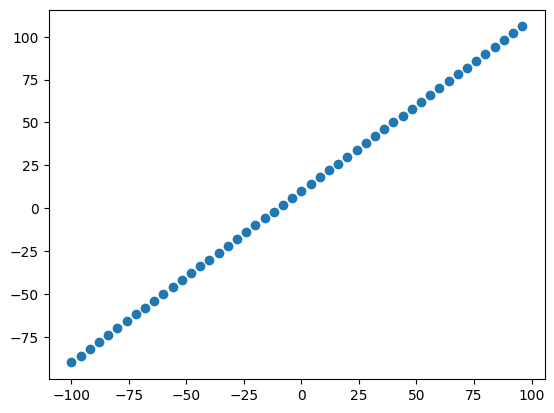

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,Y)

### The 3 sets


In [ ]:
len(X)

50

In [ ]:
X_train=X[:40]
Y_train=Y[:40]
X_test=X[40:]
Y_test=Y[40:]
len(X_train),len(X_test),len(Y_train),len(Y_test)

(40, 10, 40, 10)

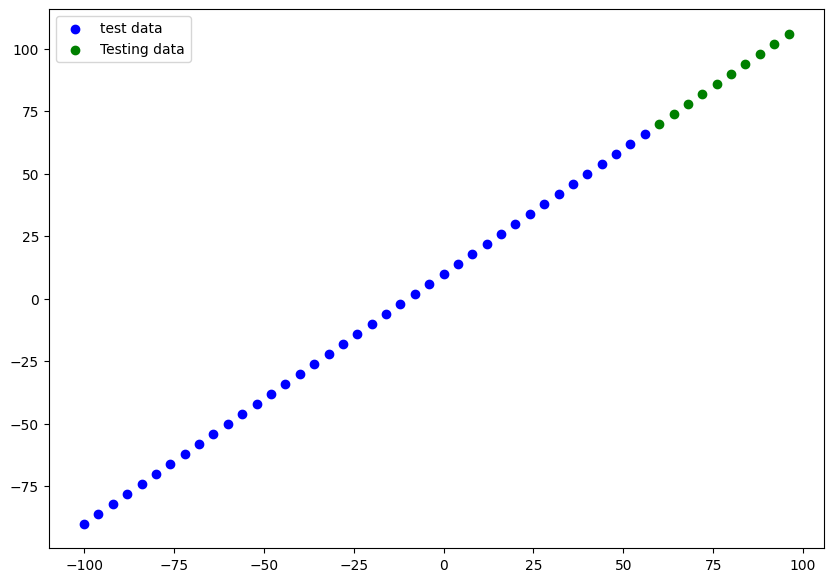

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,Y_train,c='b',label='test data')
plt.scatter(X_test, Y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [ ]:
# lets have a look athow to build a neural  network
#1.createa  modl
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#model.fit(tf.expand_dims(x,axis=-1,y,epochs=100))

###Visualizing the model


In [ ]:
#model.summary()

In [ ]:
#model.build()

In [ ]:
from keras.src import optimizers
# lets craete a model which builds the models automatically by defining input_shape argument
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
     tf.keras.layers.Dense(10,input_shape=[1],name="input_layer1"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")
#2 compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=["mae"])

In [ ]:

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 input_layer1 (Dense)        (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100,verbose=0)


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 input_layer1 (Dense)        (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow

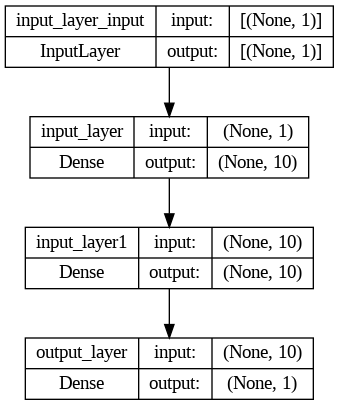

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True )

In [ ]:
### visulaizing our model predictions


 Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [ ]:
y_pred =model.predict(X_test)
y_pred

1/1 [==============================] - 0s 60ms/step


array([[ 74.06721 ],
       [ 78.34711 ],
       [ 82.62698 ],
       [ 86.906876],
       [ 91.18675 ],
       [ 95.466644],
       [ 99.74654 ],
       [104.02641 ],
       [108.30628 ],
       [112.58618 ]], dtype=float32)

In [ ]:
loss = tf.keras.losses.mean_absolute_error(Y_test, y_pred)
loss.numpy()

array([14.759676, 12.261157, 10.674603, 10.      , 10.23735 , 11.386658,
       13.447922, 16.421131, 20.306282, 24.586182], dtype=float32)

In [ ]:
#tensorflowf.keras.mae(X)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**

In [ ]:
# lets create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=X_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  plt.scatter(test_data,test_labels,c="g",label="testing data")
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend();

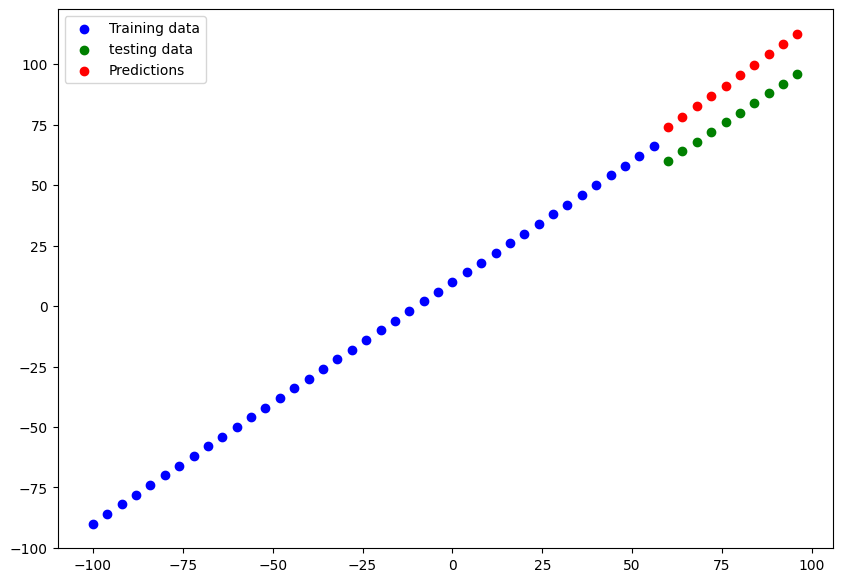

In [ ]:
plot_predictions()

Evaluating

In [ ]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 107ms/step - loss: 5.3267 - mae: 5.3267


[5.326696872711182, 5.326696872711182]

In [ ]:
mae=tf.metrics.mean_absolute_error(y_true=Y_test,
                                   y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([14.759676, 12.261157, 10.674603, 10.      , 10.23735 , 11.386658,
       13.447922, 16.421131, 20.306282, 24.586182], dtype=float32)>

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
y_pred

array([[ 74.06721 ],
       [ 78.34711 ],
       [ 82.62698 ],
       [ 86.906876],
       [ 91.18675 ],
       [ 95.466644],
       [ 99.74654 ],
       [104.02641 ],
       [108.30628 ],
       [112.58618 ]], dtype=float32)

In [ ]:
#check the tensor shapes
Y_test.shape,y_pred.shape


(TensorShape([10]), (10, 1))

we need to remove remove 1


In [ ]:
y_pred.squeeze().shape


(10,)

In [ ]:
y_pred.squeeze()


array([ 74.06721 ,  78.34711 ,  82.62698 ,  86.906876,  91.18675 ,
        95.466644,  99.74654 , 104.02641 , 108.30628 , 112.58618 ],
      dtype=float32)

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=Y_test,
                                     y_pred=y_pred.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=5.3266983>

In [ ]:
mse=tf.metrics.mean_squared_error(y_true=Y_test,
                                     y_pred=y_pred.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=29.019983>

using only tensorflow

In [ ]:
tf.reduce_mean(tf.abs(Y_test-y_pred.squeeze()))

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 111.2663 - mae: 111.2663
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 75.8108 - mae: 75.8108
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 38.2382 - mae: 38.2382
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 8.4636 - mae: 8.4636
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0752 - mae: 11.0752
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 10.2337 - mae: 10.2337
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2465 - mae: 9.2465
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1795 - mae: 9.1795
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 11.7967 - mae: 11.7967
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 13.7201 - mae: 13.7201
Epoch 11/100
2/2 [==============================] - 0s 8ms/step

1/1 [==============================] - 0s 97ms/step


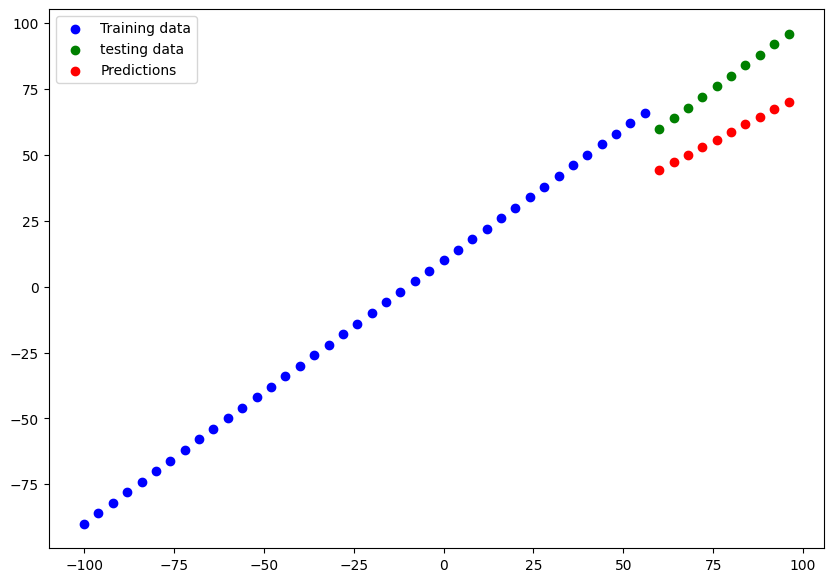

In [ ]:
y_preds_1 =model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 metrics
mae_1 = mae(Y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(Y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1


(30.709942, 953.5729)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 37ms/step


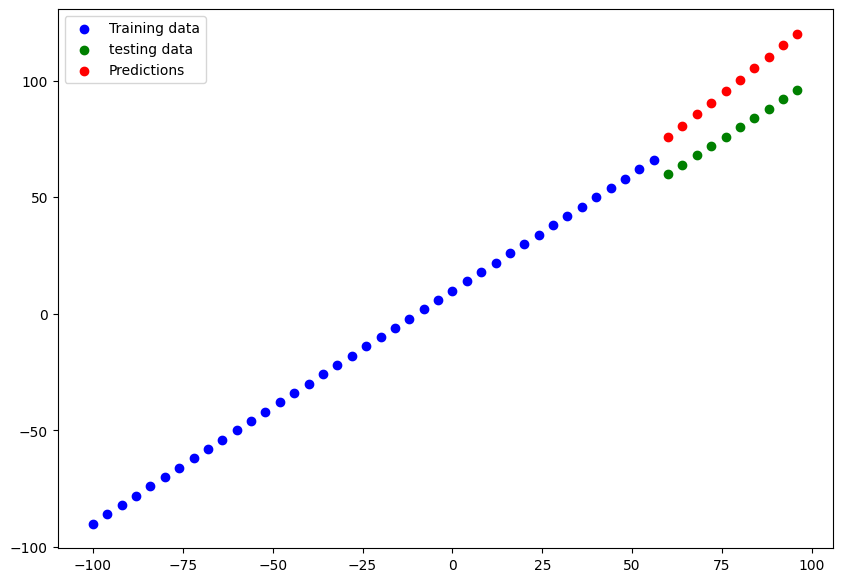

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = mae(Y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(Y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(9.864581, 104.47362)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 41ms/step


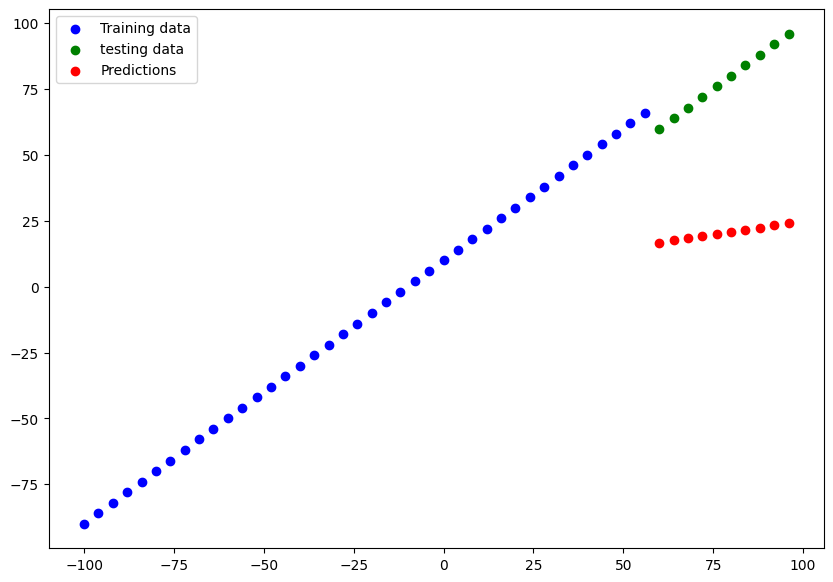

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = mae(Y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(Y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.5978, 4653.475)

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.709942,953.572876
1,model_2,9.864581,104.473618
2,model_3,67.597801,67.597801


In [ ]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [ ]:
!ls best_model_SavedModel_format


assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [ ]:
loaded_model=tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1)                 2         
                                                                 
 dense_29 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2_preds=model_2.predict(X_test)
loaded_model_preds=loaded_model.predict(X_test)
model_2_preds==loaded_model_preds

1/1 [==============================] - 0s 37ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

Download a model (or any other files) from google colab
if you want


In [ ]:
from google.colab import files
#files.download()

In [ ]:
# for larger example
import tensorflow as ttf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["smoker"],insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X),len(X_train)

(1338, 1070)

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
   tf.keras.layers.Dense(10),

  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13314.0195 - mae: 13314.0195
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13192.2646 - mae: 13192.2646
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12928.8154 - mae: 12928.8154
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12383.2451 - mae: 12383.2451
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11404.3809 - mae: 11404.3809
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 10012.3877 - mae: 10012.3877
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8569.3604 - mae: 8569.3604
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7675.6885 - mae: 7675.6885
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7468.9248 - mae: 7468.9248
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7441.1411 - ma

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4990.7251 - mae: 4990.7251


[4990.72509765625, 4990.72509765625]

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4990.7251 - mae: 4990.7251


[4990.72509765625, 4990.72509765625]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
insurance_model_2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 100)               1200      
                                                                 
 dense_36 (Dense)            (None, 10)                1010      
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Text(0.5, 0, 'epochs')

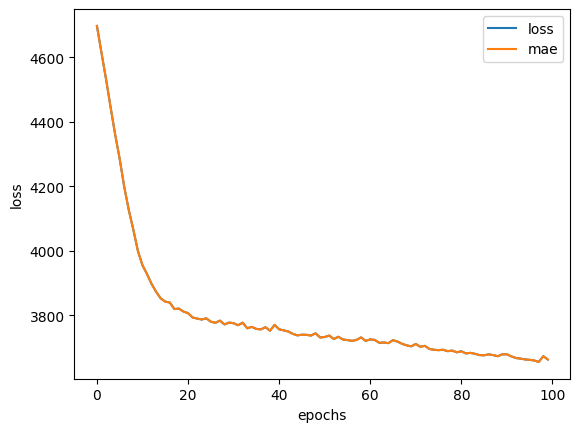

In [ ]:
# ploting history ( also known as a loss curve or  a training )
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

<Axes: ylabel='Frequency'>

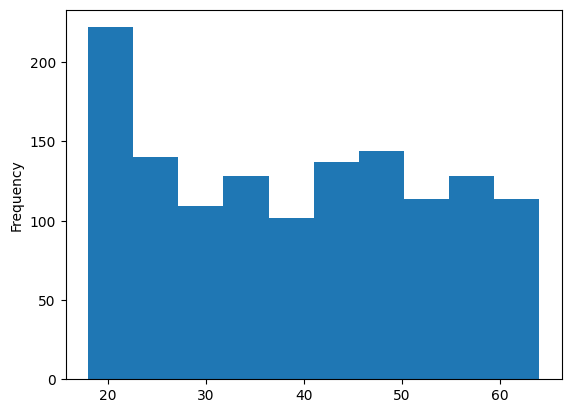

In [ ]:
# early stopping
X["age"].plot(kind="hist")

In [ ]:
# Preprocessing data( normalization and standardization)
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
insurance =pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [ ]:
insurance_model_3.evaluate(X_test,y_test)